'''There are hundreds of years-old historical structures that preserve a country's and community's history for future 
generations and promote tourism opportunities.To help the travel and tourism industries, 
it has been decided to use advanced machine learning techniques to monitor 
the condition of these historical structures and report to government agencies if any of them need maintenance.
Also, understanding customers (tourists) and their expectations is critical for effective marketing. 
A recommendation engine is an excellent way to supplement existing marketing outreach to prospects.'''

# XYZ Pvt. Ltd., a leading industry consulting firm, has been hired to help the cause by developing an intelligent and automated 
# AI model using TensorFlow that can predict the category of a structure in an image.

# Plot the sample images (8–10) from each class or category to gain a better understanding of each class

Category:altar


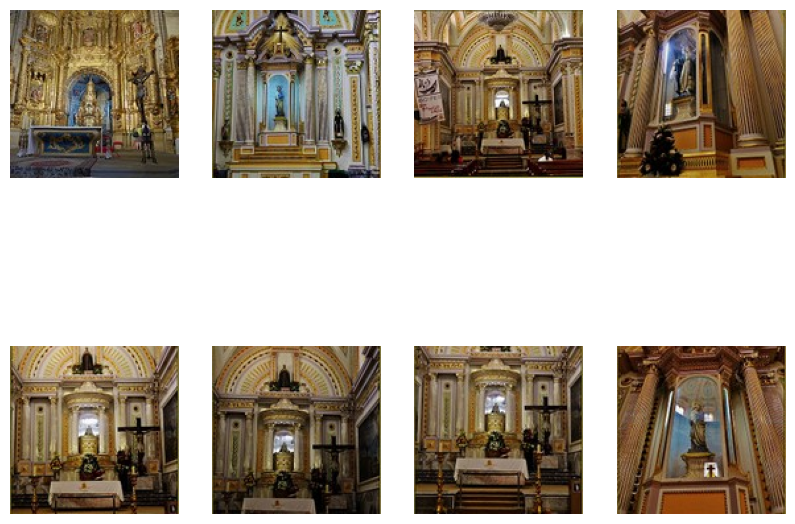

Category:apse
Error: Unable to load image at C:\Mukti\AI & ML Training\Capstone Project\Historical Structures Classification\Datasets\Part 1\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset\apse\1024px-Iglesia_de_Santiago_de_Mens_(┬ábside).jpg


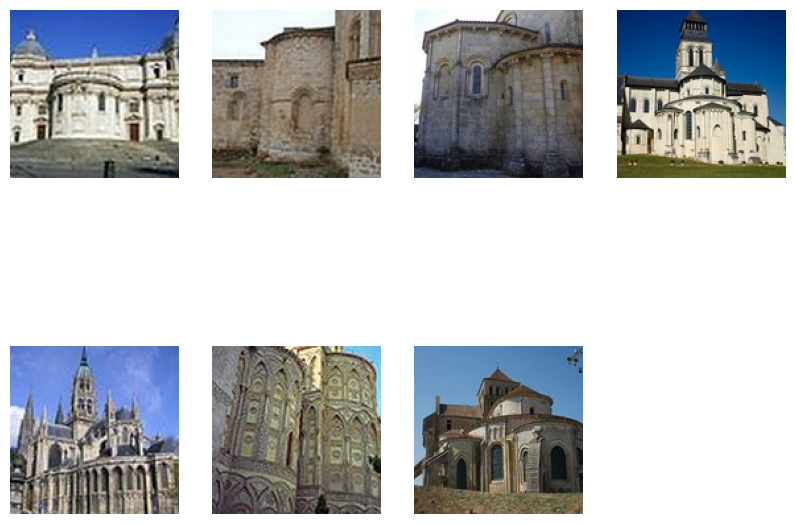

Category:bell_tower


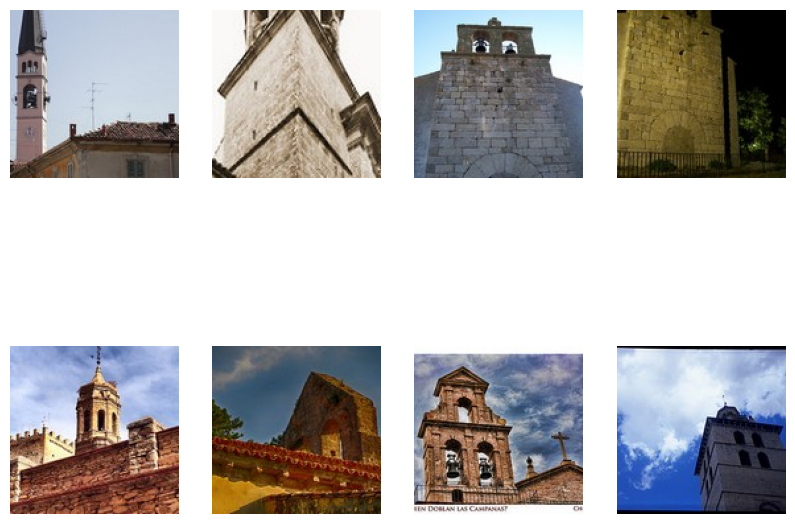

Category:column


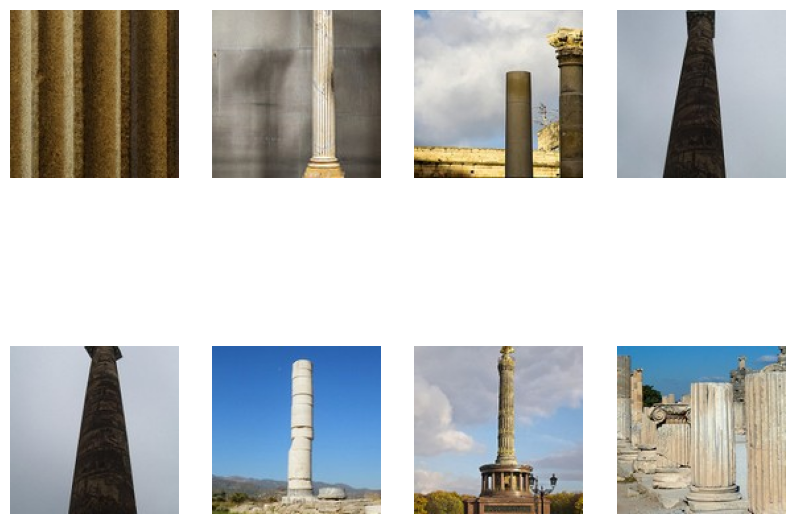

Category:dome(inner)


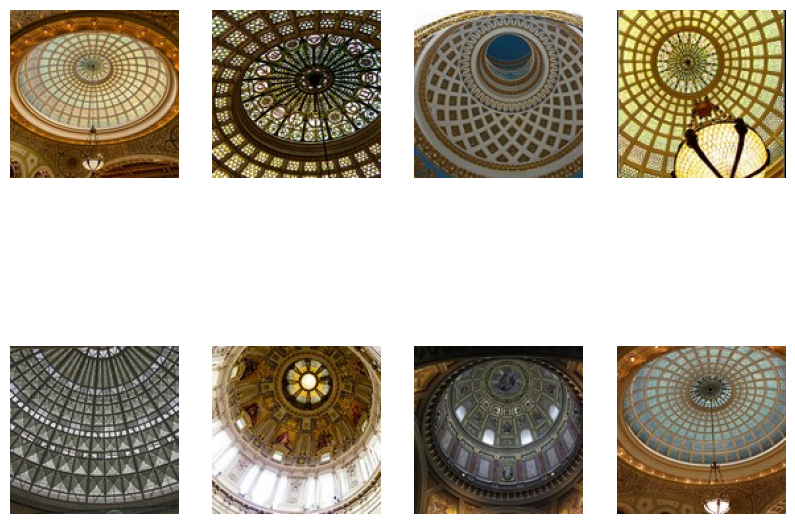

Category:dome(outer)


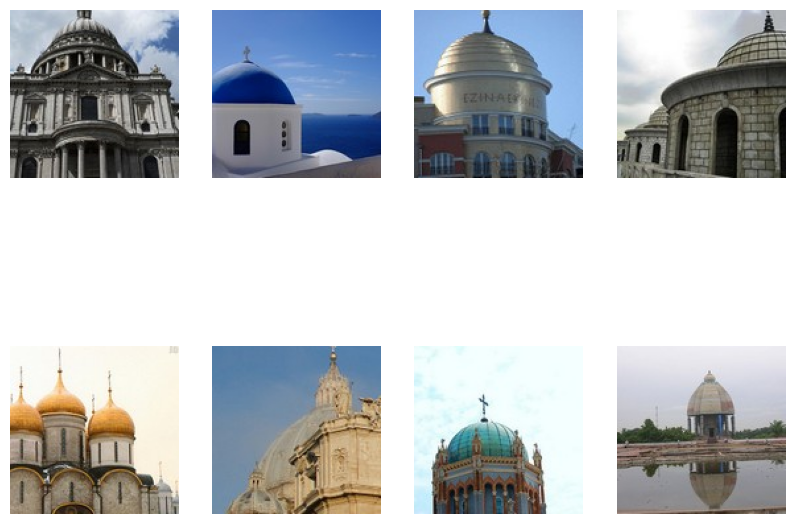

Category:flying_buttress


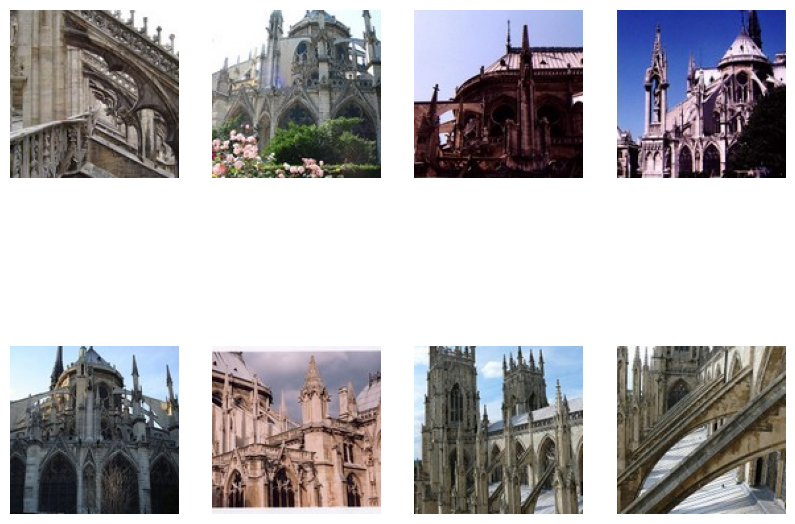

Category:gargoyle


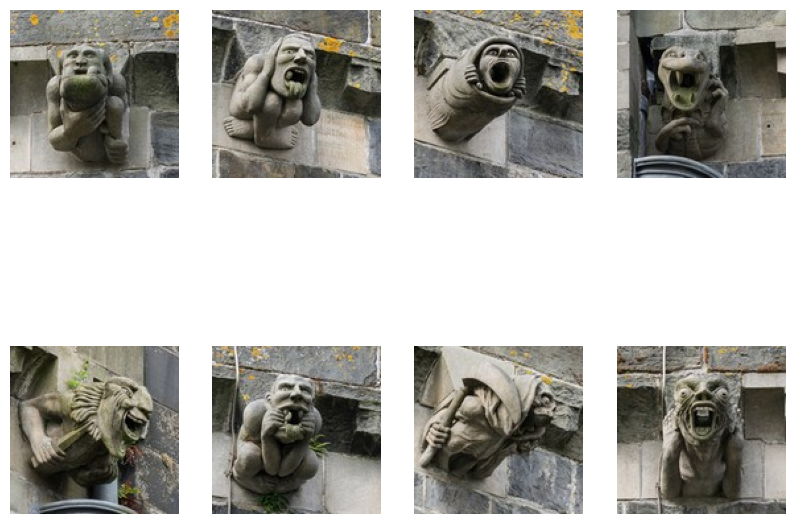

Category:stained_glass


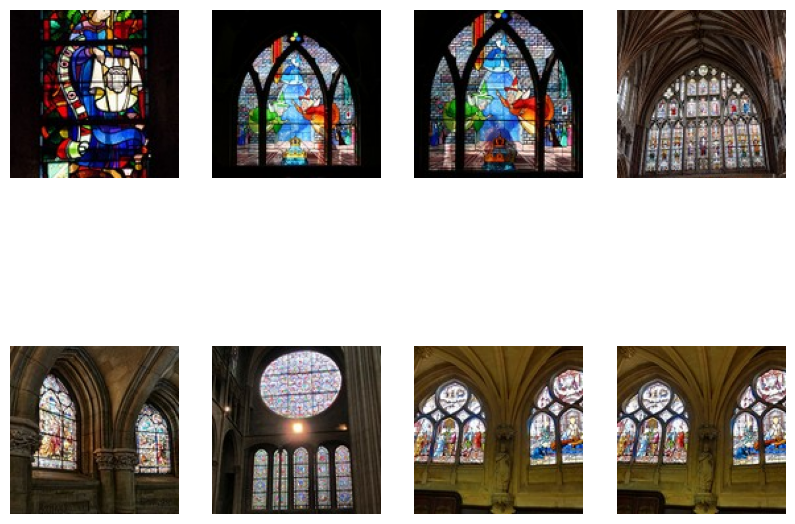

Category:vault


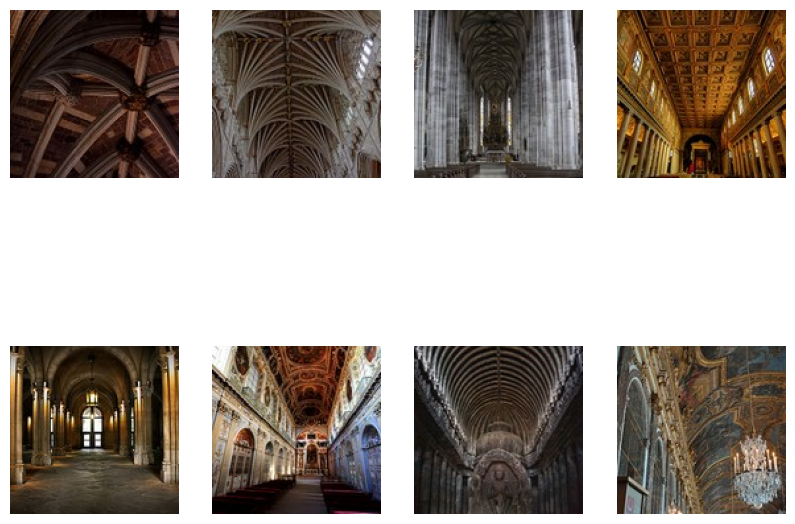

In [1]:
import os
from matplotlib import pyplot as plt
import cv2

data_path = 'C:\Mukti\AI & ML Training\Capstone Project\Historical Structures Classification\Datasets\Part 1\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset'
# List all the subdirectories
categories = [category for category in os.listdir(data_path) if not category.startswith('.')]

# Plot sample image from each category
for category in categories:
    category_path=os.path.join(data_path,category)
    images= [image for image in os.listdir(category_path) if not image.startswith('.')]
    print(f"Category:{category}")
    plt.figure(figsize=(10,8))
    for i in range(min(8,len(images))):
        image_path = os.path.join(category_path, images[i])
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to load image at {image_path}")
            continue  
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.subplot(2,4,i+1)
        plt.imshow(image)
        plt.axis("off")
    plt.show()

# Identify Corrupt images

In [2]:
from PIL import Image
def identify_and_remove_truncated_images(directory):
    for filename in os.listdir(directory):
        if filename == ".DS_Store":
            continue
        filepath=os.path.join(directory,filename)
        if os.path.isdir(filepath):
            pass
        if os.path.isfile(filepath): # checks if its a file
            try:
                Img=Image.open(filepath)
                Img.load()
            except (OSError, IOError) as e:
                print(f"Error processing image {filename}: {str(e)}")
                # optinally remove or move the problamative image
                os.remove(filepath)

# Remove corrupt images

In [4]:
import os

def identify_and_remove_truncated_images(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Check if current path is a directory
        if not os.path.isdir(file_path):
            continue
        
        # Your existing logic for processing images in directories
        # For example, if you have a function to process images:
        # process_images_in_directory(file_path)

image_path = "C:\\Mukti\\AI & ML Training\\Capstone Project\\Historical Structures Classification\\Datasets\\Part 1\\dataset_hist_structures 2\\dataset_hist_structures\\Stuctures_Dataset"

for folder in os.listdir(image_path):
    folder_path = os.path.join(image_path, folder)
    
    # Make sure we are only passing directories
    if os.path.isdir(folder_path):
        identify_and_remove_truncated_images(folder_path)



# Select an CNN architecture of your choice to train the CV model. 
# Configure the architecture for transfer learning, set up a TensorFlow environmentfor the selected backbone architecture, and load pre-trained weights

In [5]:
from tensorflow.keras.applications import VGG16
# Load the pre-trained model without top layer
base_model=VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))


# Freeze all convolutional layer's weight

In [6]:
for layer in base_model.layers:
    layer.trainable=False

# Add dense layers and dropout for regularization

In [7]:
num_classes=len(categories)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
]) # num classes is num of categories

# Compile the model

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Define callback class to stop the training once the validation accuracy reaches certain number

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Configure the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Metric to monitor
    patience=3,             # Number of epochs with no improvement after which training will be stopped
    verbose=1)
# Verbosity mode; 1 will print messages for each event
#)

# Setup train and test datasets directories and review the number of image samples for train and test set. 
# Train the model without augmentation while continously monitoring the validation accuracy

In [10]:
batch_size=32
epochs=2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_dir="C:\Mukti\AI & ML Training\Capstone Project\Historical Structures Classification\Datasets\Part 1\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset"
validation_data_dir="C:\Mukti\AI & ML Training\Capstone Project\Historical Structures Classification\Datasets\Part 1\dataset_hist_structures 2\dataset_hist_structures\Dataset_test\Dataset_test_original_1478"

In [11]:
import os
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def remove_corrupted_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                # Attempt to open the image file
                with Image.open(file_path) as img:
                    img.verify()  # Check if image is complete
            except (IOError, SyntaxError, OSError) as e:
                print(f"Corrupted image found and removed: {file_path}")
                os.remove(file_path)

# Apply for both training and validation directories
remove_corrupted_images(train_data_dir)
remove_corrupted_images(validation_data_dir)

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(224,224),batch_size=batch_size,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size=(224,224),batch_size=batch_size,class_mode='categorical')

Found 10232 images belonging to 10 classes.
Found 1466 images belonging to 10 classes.


In [14]:
model.fit(train_generator,epochs=epochs,
          validation_data=validation_generator,
          callbacks=[early_stopping])

Epoch 1/2


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 1935s 6s/step - accuracy: 0.6860 - loss: 1.1228 - val_accuracy: 0.8568 - val_loss: 0.4334
Epoch 2/2
320/320 ━━━━━━━━━━━━━━━━━━━━ 2043s 6s/step - accuracy: 0.8749 - loss: 0.3888 - val_accuracy: 0.8786 - val_loss: 0.3929


# Train model with augmentation  and keep monitoring validation accuracy

In [15]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_data_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10232 images belonging to 10 classes.


In [16]:
history=model.fit(train_generator_aug,epochs=epochs,
          validation_data=validation_generator,
          callbacks=[early_stopping])

Epoch 1/2


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 2042s 6s/step - accuracy: 0.7316 - loss: 0.8253 - val_accuracy: 0.8363 - val_loss: 0.4602
Epoch 2/2
320/320 ━━━━━━━━━━━━━━━━━━━━ 1935s 6s/step - accuracy: 0.7776 - loss: 0.6840 - val_accuracy: 0.8533 - val_loss: 0.4517


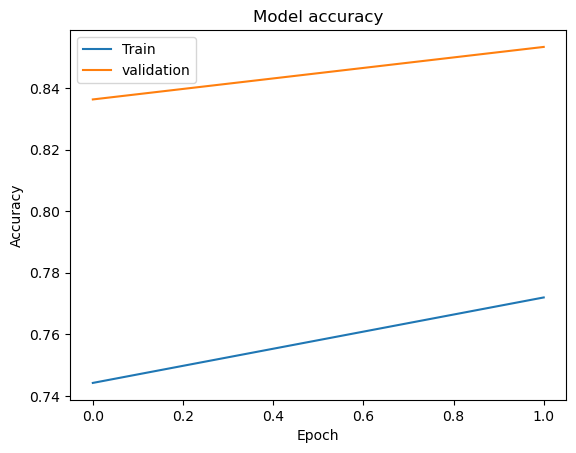

In [18]:
import matplotlib.pyplot as plt
# Assuming 'history' is the variable  storing the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()